In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv('ToyotaCorolla - MLR.csv')
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [3]:
## EDA on dataset

In [4]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [5]:
# Identify categorical columns in the dataset.
cat_col=[i for i in df.columns if df[i].dtype=='O']
cat_col

['Fuel_Type']

In [6]:
# We can only use numerical values for Linear regression, so convert string to numerical.
from sklearn.preprocessing import OneHotEncoder

In [7]:
## convert string category to numerical.
oneH=OneHotEncoder()

In [8]:
df1=pd.DataFrame(oneH.fit_transform(df[['Fuel_Type']]).toarray())

In [9]:
df=df.join(df1)

In [10]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,0,1,2
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165,0.0,1.0,0.0
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165,0.0,1.0,0.0
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165,0.0,1.0,0.0
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165,0.0,1.0,0.0
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170,0.0,1.0,0.0


In [11]:
## To get the categories list in Fuel_Type column
list(set(list(df['Fuel_Type'])))

['Diesel', 'Petrol', 'CNG']

In [12]:
df=df.rename(columns={0:'Petrol',1:'CNG',2:'Diesel'})

In [13]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Petrol,CNG,Diesel
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165,0.0,1.0,0.0
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165,0.0,1.0,0.0
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165,0.0,1.0,0.0
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165,0.0,1.0,0.0
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170,0.0,1.0,0.0


In [14]:
df.drop(columns='Fuel_Type',inplace=True)

In [15]:
df.dtypes

Price          int64
Age_08_04      int64
KM             int64
HP             int64
Automatic      int64
cc             int64
Doors          int64
Cylinders      int64
Gears          int64
Weight         int64
Petrol       float64
CNG          float64
Diesel       float64
dtype: object

In [16]:
# Statistical summary
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Petrol,CNG,Diesel
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961,0.011838,0.107939,0.880223
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112,0.108196,0.310411,0.324814
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000,0.000000,0.000000,0.000000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000,0.000000,0.000000,1.000000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000,0.000000,0.000000,1.000000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000,0.000000,0.000000,1.000000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000,1.000000,1.000000,1.000000


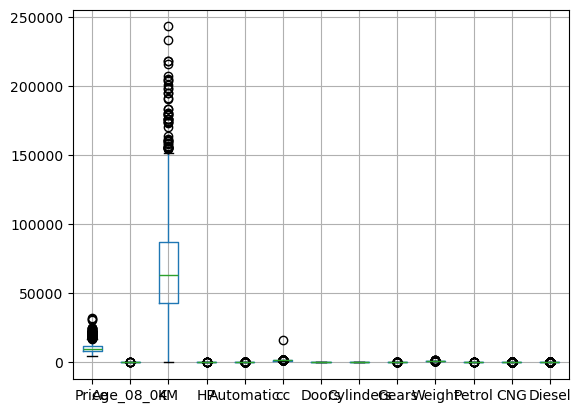

In [17]:
df.boxplot()
plt.show()

In [18]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
IQR=q3-q1

In [19]:
lower_extreme=q1-1.5*IQR
upper_extreme=q3+1.5*IQR
print(lower_extreme ,upper_extreme)

Price         3200.000
Age_08_04        5.000
KM          -23031.125
HP              60.000
Automatic        0.000
cc            1100.000
Doors            0.000
Cylinders        4.000
Gears            5.000
Weight         972.500
Petrol           0.000
CNG              0.000
Diesel           1.000
dtype: float64 Price         17200.000
Age_08_04       109.000
KM           153051.875
HP              140.000
Automatic         0.000
cc             1900.000
Doors             8.000
Cylinders         4.000
Gears             5.000
Weight         1152.500
Petrol            0.000
CNG               0.000
Diesel            1.000
dtype: float64


In [20]:
df_no_outlier = df[(df>= lower_extreme) & (df <= upper_extreme)]

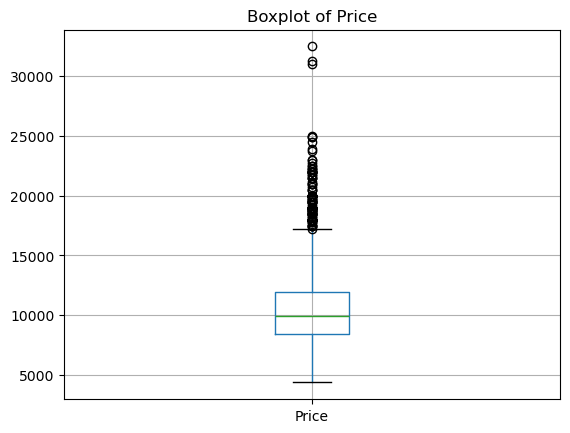

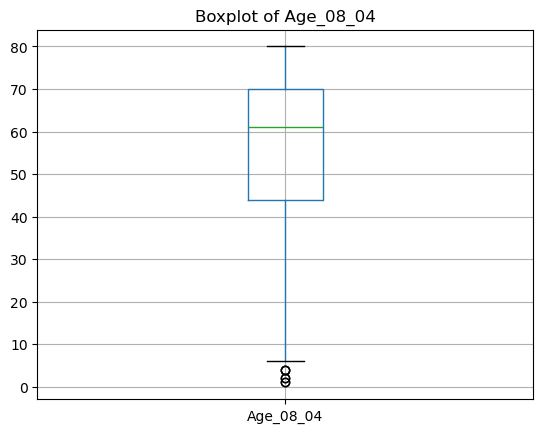

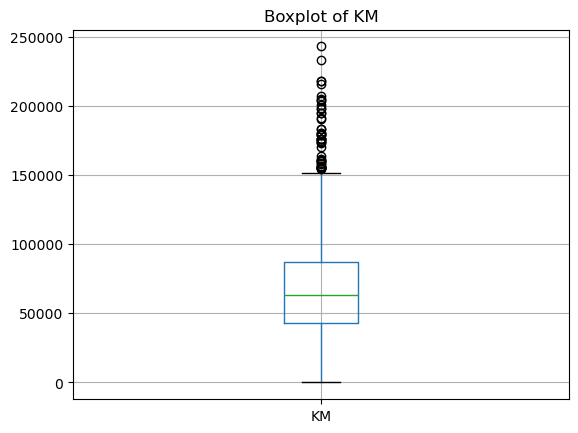

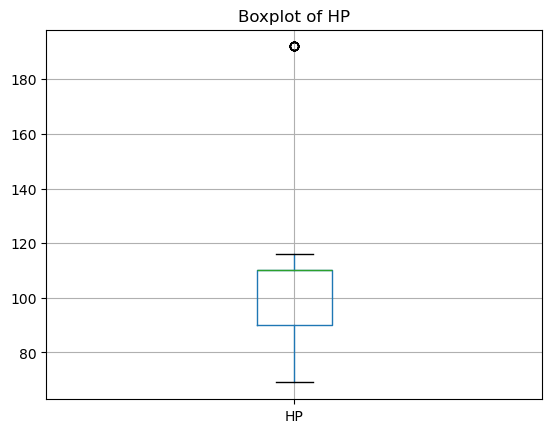

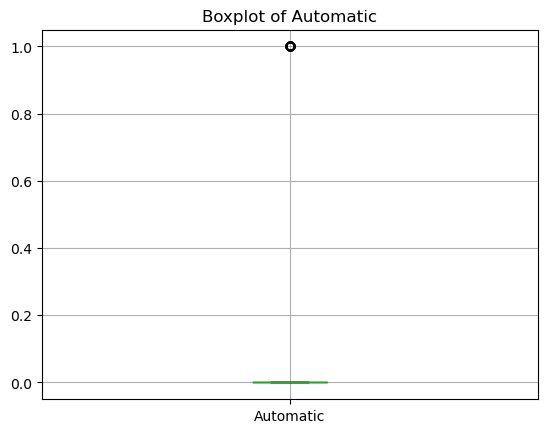

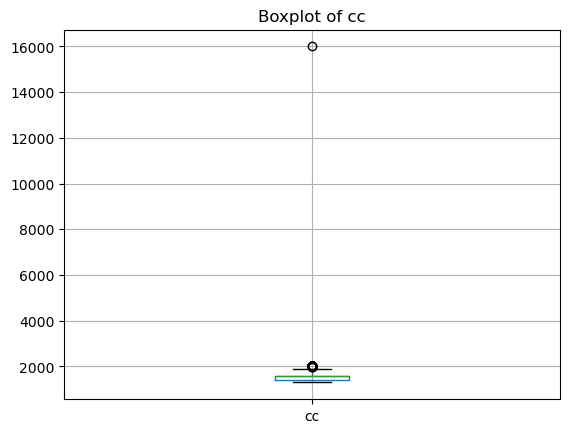

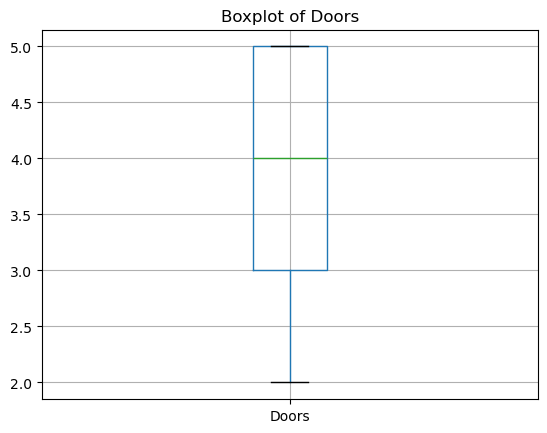

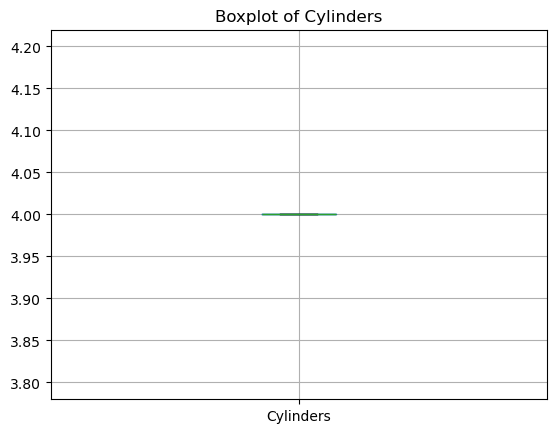

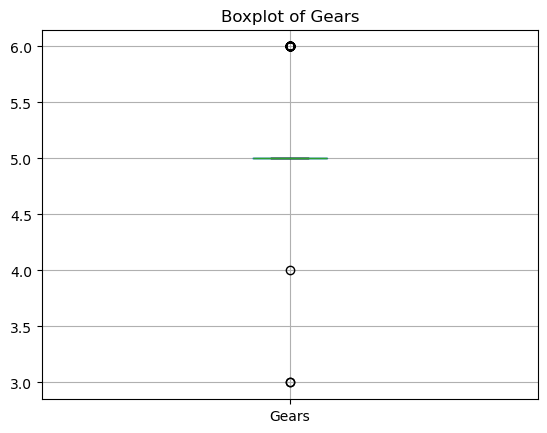

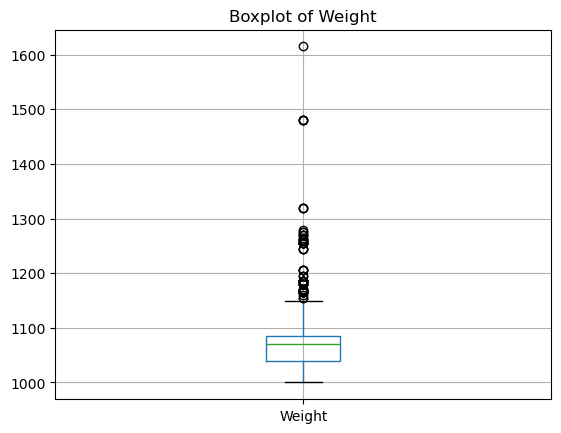

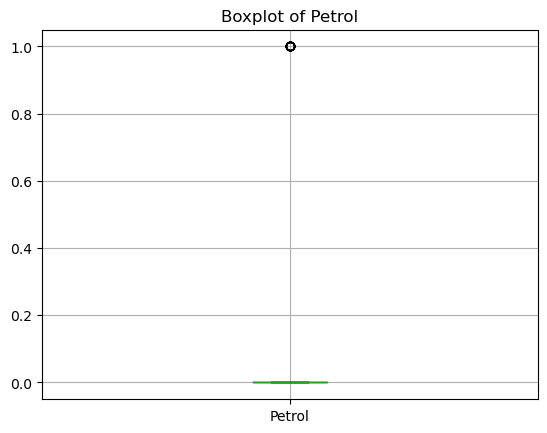

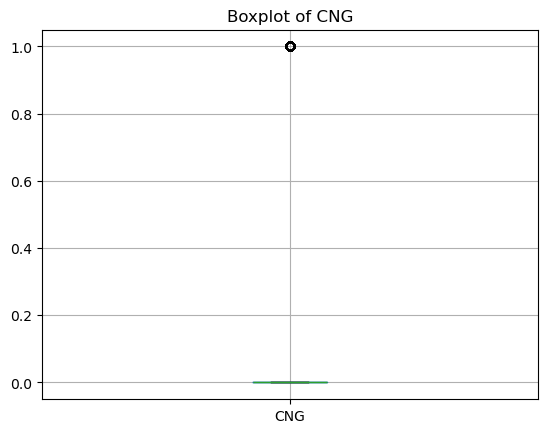

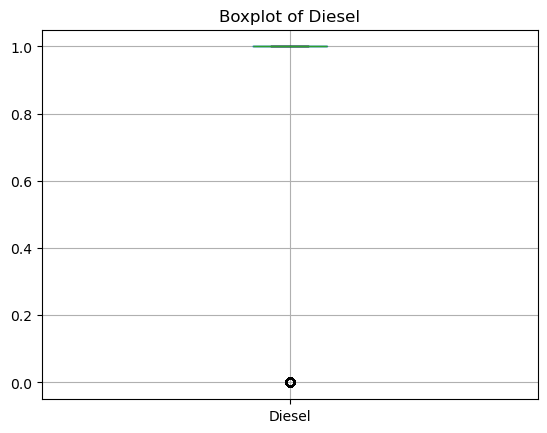

In [21]:
columns=df.columns
for col in columns:
    df.boxplot(column=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

In [22]:
# Split data to target and features

In [23]:
target=df[['Price']]

In [24]:
feature=df.drop(columns='Price')

In [25]:
x_train,x_test,y_train,y_test=train_test_split(feature,target,train_size=.8,random_state=10)

In [26]:
x_train.shape

(1148, 12)

In [27]:
x_test.shape

(288, 12)

In [28]:
y_train.shape

(1148, 1)

In [29]:
y_test.shape

(288, 1)

In [30]:
## defining the model
lin_model=LinearRegression()

In [31]:
lin_model.fit(x_train,y_train)

LinearRegression()

In [32]:
## Validation
y_pred=lin_model.predict(x_test)
y_pred

array([[ 9505.81716721],
       [10010.15719037],
       [ 8561.25025973],
       [12600.39075176],
       [10826.15072165],
       [12403.01135637],
       [10670.48407134],
       [ 7477.3171497 ],
       [15268.7567533 ],
       [ 9815.62768862],
       [ 9877.13533577],
       [ 9956.40382079],
       [10950.83064987],
       [13229.98042956],
       [16404.05105273],
       [14020.84522215],
       [ 5818.44864651],
       [15182.37198752],
       [12803.80899195],
       [ 9184.04430578],
       [ 8934.19704324],
       [ 7616.52232318],
       [ 8244.20347658],
       [ 8019.20912994],
       [ 9422.29683593],
       [ 9145.24862215],
       [10756.33336861],
       [ 6128.88833901],
       [ 8592.19336166],
       [16316.44377456],
       [12769.6952472 ],
       [ 8652.38756107],
       [13409.10431514],
       [10472.98284014],
       [ 8462.81309861],
       [ 8650.15452856],
       [10906.89993493],
       [11672.64486273],
       [11651.30488209],
       [ 7726.93071575],


In [60]:
## B0
lin_model.intercept_

array([-7372.6344752])

In [62]:
lin_model.coef_

array([[-1.23583672e+02, -1.73719292e-02,  2.71737234e+01,
         3.69249456e+02, -2.69356617e-02, -1.02486185e+01,
        -4.54747351e-13,  6.26862704e+02,  1.84927921e+01,
        -7.53848607e+02,  1.96069153e+02,  5.57779454e+02]])

In [33]:
# Check Accuracy
from sklearn.metrics import r2_score

In [34]:
r2_score(y_test,y_pred)

0.860779456918501

In [35]:
# Since this has above 80% accuracy, It is a good model

## Lasso

In [36]:
from sklearn.linear_model import Lasso,Ridge

In [37]:
lasso=Lasso(alpha=500)

In [38]:
lasso.fit(x_train,y_train)

Lasso(alpha=500)

In [39]:
ypred=lasso.predict(x_test)

In [40]:
r2_score(y_test,ypred)

0.8597757294363573

In [41]:
var=range(1,100)

In [42]:
params=dict(alpha=var)
params

{'alpha': range(1, 100)}

In [43]:
grid_search=GridSearchCV(lasso,params)

In [44]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=Lasso(alpha=500), param_grid={'alpha': range(1, 100)})

In [45]:
grid_search.best_params_

{'alpha': 99}

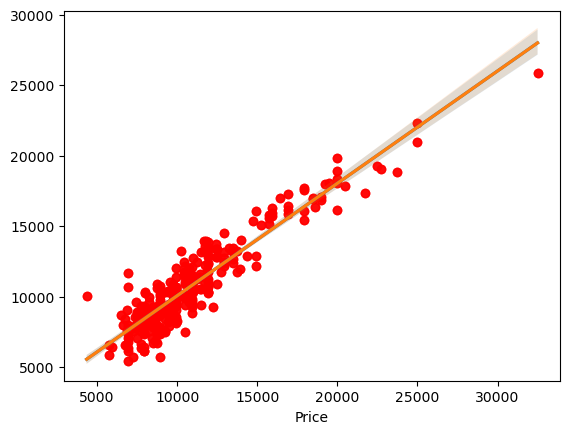

In [50]:
sns.regplot(data=df,x=y_test,y=ypred,scatter_kws={'color':'red'})
plt.show()

## RIDGE

In [52]:
ridge=Ridge()

In [53]:
ridge.fit(x_train,y_train)

Ridge()

In [55]:
y_pred=ridge.predict(x_test)

In [57]:
r2_score(ypred,y_test)

0.8091328462583731

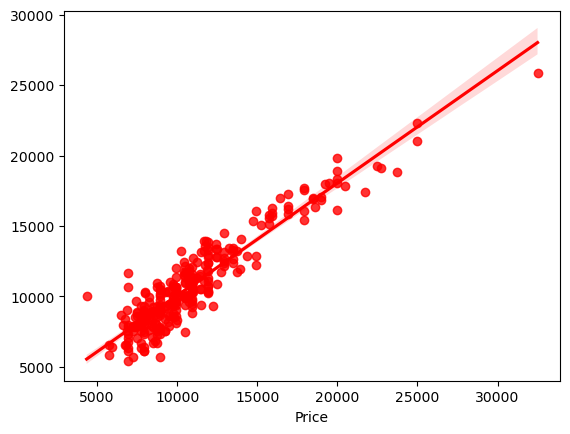

In [59]:
sns.regplot(data=df,x=y_test,y=ypred,scatter_kws={'color':'red'},line_kws={'color':'red'})
plt.show()